In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
np.random.seed(201)
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets

from scipy.spatial.distance import cdist
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import silhouette_score

[4 4 4 3 3 3 1 0 2 2 4 3 2 4 0 1 0 4 4 1 2 4 1 0 3 2 3 3 3 3 0 2 3 3 4 1 1
 0 4 0 3 0 3 3 1 4 1 3 1 2 0 4 1 1 4 4 0 3 3 1 1 4 1 3 1 1 3 4 1 1 2 1 3 4
 3 1 3 2 3 2 1 4 2 1 4 4 0 1 0 0 0 2 2 3 2 3 4 2 4 2 1 3 0 4 4 3 2 0 0 0 3
 2 2 0 3 0 1 1 1 0 1 0 0 2 4 3 4 4 2 4 3 0 2 0 4 2 3 0 3 1 3 1 0 0 0 0 0 3
 3 1 0 3 0 1 3 0 4 3 4 2 4 3 2 0 1 3 1 2 1 0 3 0 2 2 4 4 1 1 0 4 2 2 2 0 0
 4 0 1 3 3 0 0 4 1 1 0 2 4 4 4 1 4 3 1 1 2 2 4 2 1 0 0 4 1 3 4 1 2 0 0 2 3
 4 1 2 2 2 2 4 2 4 3 0 0 3 2 1 3 1 2 2 2 2 0 0 2 1 1 1 0 0 2 4 1 4 3 1 3 1
 4 2 4 0 1 4 2 3 1 0 3 2 2 2 3 4 2 0 0 2 2 1 2 2 0 1 3 3 3 2 4 4 4 4 4 3 1
 4 3 0 4]


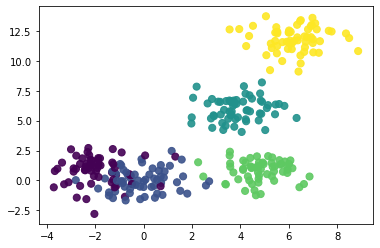

In [14]:
# create blobs
c = [(-2,1),(0,0),(4,6),(5,1),(6,12)]

n=300
data = make_blobs(n_samples=n, n_features=2, centers=c, cluster_std=1, random_state=50)

X = data[0]
labels = data[1]

print(labels)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.show(True)

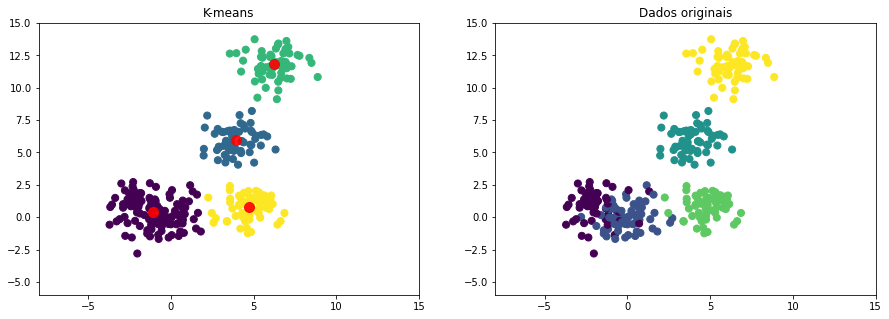

In [6]:
k = 4 # numero de clusters a serem identificados
# define o método com k clusters
kmeans = KMeans(n_clusters=k) 

# realiza o ajuste considerando os dados X
kmeans.fit(X)

# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(X)

# define o tamanha da figura
plt.figure(figsize=(15,5))

# # mostra o primeiro gráfico
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.xlim(-8,15)
plt.ylim(-6,15)
plt.title('K-means')
centers = kmeans.cluster_centers_
# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9); 

# mostra o segundo gráfico
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.xlim(-8,15)
plt.ylim(-6,15)
plt.title('Dados originais')
plt.show(True)

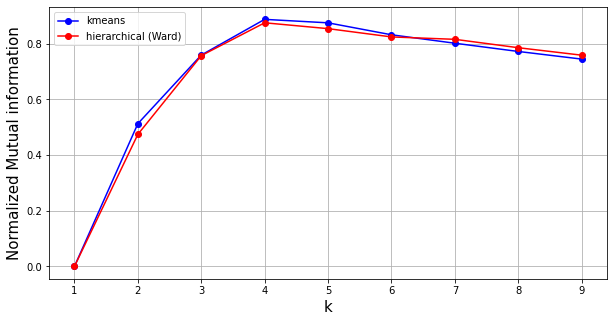

In [12]:
NMI_km = []
NMI_hr = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    NMI_km.append(normalized_mutual_info_score(y_km, data[1], average_method='arithmetic'))
    clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
    y_hr = clustering.fit_predict(X)
    NMI_hr.append(normalized_mutual_info_score(y_hr, data[1], average_method='arithmetic'))
plt.figure(figsize=(10,5))
plt.plot(K, NMI_km, '-bo', label = 'kmeans')
plt.plot(K, NMI_hr, '-ro', label = 'hierarchical (Ward)')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Normalized Mutual information', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()